<a href="https://colab.research.google.com/github/PhanChenh/SentimentAnalysis_Restaurant_NLPproject/blob/main/SentimentAnalysis_RestaurantReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with Restaurant Review Dataset

## Project overview:
Project title: Sentiment Analysis

Database: Restaurant dataset that comprises 8,879 reviews of a single restaurant. These reviews are categorized into eight distinct aspects: food, service, staff, price, ambience, menu, place, and miscellaneous. The dataset named as train.json, test.json, and val.json were attached in github.

Sentiment analysis is a technique in natural language processing (NLP) and text mining that involves analyzing and determining the emotional tone or sentiment expressed in a piece of text. The goal is to understand the feelings, opinions, or attitudes conveyed by the text, whether it's positive, negative, neutral, or even more specific emotions like anger, joy, or sadness.

## Objectives:

Sentiment analysis in this restaurant review dataset involves analyzing customer reviews to determine whether the sentiment is positive, negative, or neutral. By examining key aspects like food, service, staff, ambiance, and price, the project aims to uncover customer experiences and identify areas for improvement. The goal is to provide actionable insights that help optimize restaurant operations, enhance customer satisfaction, and improve overall performance. With these insights, the restaurant can refine its strategies, improve service quality, and ultimately boost customer loyalty.

## Project Structure:
1. Text Preprocessing:

Clean the review data by removing noise such as special characters, stop words, and any irrelevant information to prepare the text for analysis.

2. Exploratory Data Analysis (EDA):

Perform some basic analysis and visualizations to get an overall understanding of the data, looking at trends and patterns.

3. Train the Model (LSTM with Attention):

Train the LSTM model with an attention mechanism to highlight the important words related to the review's aspects and sentiment.

4. Apply the Model & Generate Insights:

Use the trained model on the dataset to make predictions. Then, analyze the new dataset by visualizing the results to gain insights and understand the overall sentiment.






## Foreword

In the era of digital reviews, businesses—especially restaurants—are increasingly relying on customer feedback to improve their services, products, and overall customer experience. However, raw reviews are often unstructured, highly varied in language, and context-dependent, making it challenging to extract actionable insights. This is where advanced natural language processing (NLP) models come into play.

To effectively analyze the sentiment, context, and reasons behind customer reviews, it is necessary to employ models that can capture complex linguistic patterns and contextual relationships. The Long Short-Term Memory (LSTM) model with attention and Word2Vec Skip-gram embeddings provide an ideal solution to this problem.

Imagine a sentence like "The food was good, but it was too cold." To understand whether the review is positive or negative, it's important to know that while "good" is a positive word, "too cold" could shift the sentiment to negative. LSTM models are designed to read through entire sentences, remembering what came before and after a word, which allows them to understand the context of phrases like "too cold" despite them coming after a positive word like "good". This is especially useful in customer reviews where sentiment can be mixed, and subtle changes in phrasing matter.

Moreover, attention mechanisms help the model figure out which parts of the sentence matter the most. For example, if a review says, "It’s not good," the word "not" significantly changes the sentiment. The attention mechanism helps the model focus on "not" and realize that it negates the positive meaning of "good"—this enables the model to classify the sentiment correctly, even in tricky situations like this.

The Word2Vec Skip-Gram model helps by converting words into numerical values that capture their meanings based on context. For example, it understands that "good" is related to words like "excellent", and "bad" is related to "terrible". But it doesn’t just focus on the individual words—it also learns the context in which those words appear. This is important because, in customer reviews, words often change meaning depending on the context.

If the review says "The service was good, but the food was not good," Word2Vec helps understand that "good" and "not good" are related but have opposite meanings in this context, allowing the model to differentiate between positive and negative sentiment correctly.

=> Using just basic word counting or simple rules won’t capture the full meaning of a review, especially when negation is involved. For example, a sentence like "It’s not good" could easily be misclassified as positive without proper analysis. But by using LSTM with attention and Word2Vec, we can make sure the model understands the word "not" as something that flips the sentiment, ensuring that negative reviews are identified accurately.

By using these advanced models, we can gain more accurate and nuanced insights into customer sentiment, helping restaurant owners and managers understand specific areas that need improvement, such as food quality, service speed, or overall atmosphere. This deep analysis can lead to better decisions and targeted improvements, ultimately enhancing the customer experience.

If you run into the error indicates that torch (PyTorch) is not available for your Python version or platform through pip. Please run the code in google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import necessary libraries

In [ ]:
import pandas as pd
from collections import Counter
import numpy as np
import gensim.downloader as api
from gensim.models import Word2Vec
from gensim.models import FastText
from nltk.corpus import stopwords
import json
import re
import nltk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# import torchtext
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Preprocessing

In this section, preprocessing will be done. Given test, validation and test dataset, the test and validation dataset will be combined into one big train dataset which will be used to predict the test dataset.

In [ ]:
## read dataset - connect to google drive account

train = open("drive/MyDrive/nlp_data/train.json")
val = open("drive/MyDrive/nlp_data/val.json")
test = open("drive/MyDrive/nlp_data/test.json")


In [ ]:
train_data = json.load(train)
val_data = json.load(val)
test_data = json.load(test)

In [ ]:
len(val_data["data"]) + len(train_data["data"])+len(test_data["data"])

8879

In [ ]:
# Initialize combined all train, val and test lists
all_reviews = []
all_aspects = []
all_labels = []

# Combine training and validation data
for i in train_data["data"]:
    all_reviews.append(i[0])
    all_aspects.append(i[1])
    all_labels.append(i[2])

for i in val_data["data"]:
    all_reviews.append(i[0])
    all_aspects.append(i[1])
    all_labels.append(i[2])

# Combine test data
for i in test_data["data"]:
    all_reviews.append(i[0])
    all_aspects.append(i[1])
    all_labels.append(i[2])

# Now, all_reviews, all_aspects, and all_labels contain the combined data


In [ ]:
# Sample DataFrame creation
df = pd.DataFrame({
    'review': all_reviews,
    'aspect': all_aspects,
    'label': all_labels
})

# Convert DataFrame rows to a list of lists
combine_original = df.values.tolist()

# Display the resulting list
combine_original


[["It might be the best sit down food I've had in the area, so if you are going to the upright citizen brigade, or the garden, it could be just the place for you.",
  'food',
  'positive'],
 ["It might be the best sit down food I've had in the area, so if you are going to the upright citizen brigade, or the garden, it could be just the place for you.",
  'place',
  'neutral'],
 ['Hostess was extremely accommodating when we arrived an hour early for our reservation.',
  'staff',
  'positive'],
 ['Hostess was extremely accommodating when we arrived an hour early for our reservation.',
  'miscellaneous',
  'neutral'],
 ["We were a couple of minutes late for our reservation and minus one guest, but we didn't think we deserved the attitude we got from the hostess.",
  'miscellaneous',
  'neutral'],
 ["We were a couple of minutes late for our reservation and minus one guest, but we didn't think we deserved the attitude we got from the hostess.",
  'staff',
  'negative'],
 ['Though the servic

In [ ]:
# Combine lists into a DataFrame
df = pd.DataFrame({
    'review': all_reviews,
    'aspect': all_aspects,
    'label': all_labels
})

# Display the resulting DataFrame
print(df)

                                                 review         aspect  \
0     It might be the best sit down food I've had in...           food   
1     It might be the best sit down food I've had in...          place   
2     Hostess was extremely accommodating when we ar...          staff   
3     Hostess was extremely accommodating when we ar...  miscellaneous   
4     We were a couple of minutes late for our reser...  miscellaneous   
...                                                 ...            ...   
8874  There are only 8-10 tables, so you receive a l...          place   
8875  There are only 8-10 tables, so you receive a l...          staff   
8876  My friend and I did have to wait a few minutes...  miscellaneous   
8877  My friend and I did have to wait a few minutes...           food   
8878  My friend and I did have to wait a few minutes...          staff   

         label  
0     positive  
1      neutral  
2     positive  
3      neutral  
4      neutral  
...      

Extracting business insights from data can provide valuable feedback to improve services, address customer concerns, and enhance overall satisfaction.

1. Aspect Frequency Analysis

Most Mentioned Aspects: Identify which aspects (e.g., food, service, staff) are mentioned most frequently. This helps pinpoint what matters most to customers.

<ipython-input-9-7183d8fcbd72>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=aspects, palette='Blues_d')


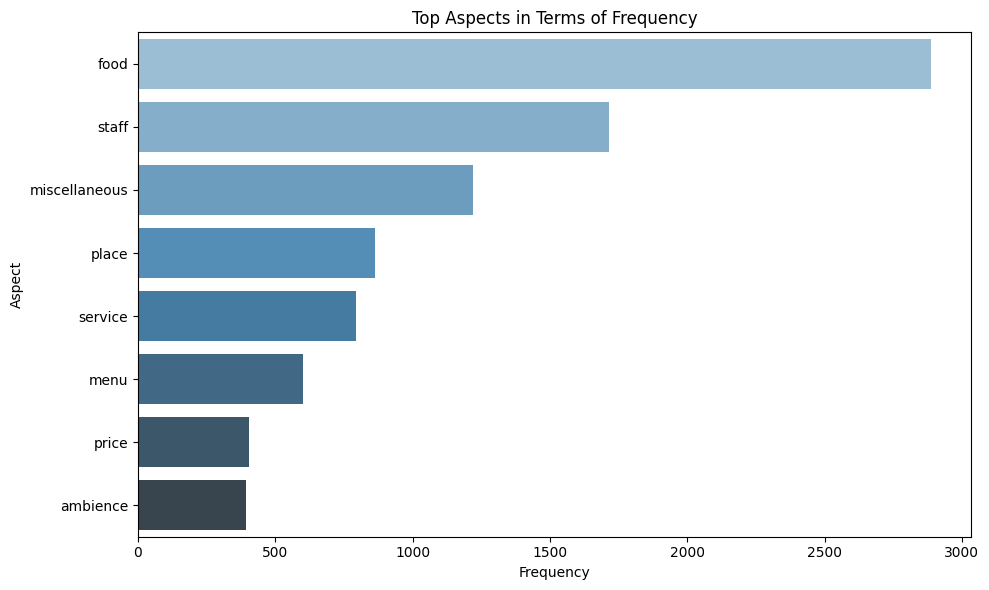

In [ ]:
# Business Insight: Top Aspects in Terms of Frequency
def top_aspects(data, top_n=10):
    aspect_count = {}
    for review in data:
        aspect = str(review[1])  # Aspect only (not sentiment)
        if aspect not in aspect_count:
            aspect_count[aspect] = 1
        else:
            aspect_count[aspect] += 1

    # Sort the aspects by frequency and get the top N
    sorted_aspects = sorted(aspect_count.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return sorted_aspects

# Top aspects in combined train+validation dataset
top_aspects_combined = top_aspects(combine_original)

# Plotting the top aspects
def plot_top_aspects(top_aspects):
    aspects = [item[0] for item in top_aspects]
    counts = [item[1] for item in top_aspects]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=aspects, palette='Blues_d')
    plt.title("Top Aspects in Terms of Frequency")
    plt.xlabel('Frequency')
    plt.ylabel('Aspect')
    plt.tight_layout()
    plt.show()

plot_top_aspects(top_aspects_combined)

After the aspect frequency analysis, seeing that food, staff, and miscellaneous got mentioned the most, next moving on sentiment distribution by aspects.

2. Sentiment Distribution by Aspect

Positive vs. Negative Polarity: Analyze the sentiment (positive, neutral, negative) distribution for each aspect.

Determine which aspects drive satisfaction (positive) or dissatisfaction (negative). For example, if "service" has a high negative polarity, it indicates a need for operational improvement.


               positive_percentage  neutral_percentage  negative_percentage
food                     32.479224           56.648199            10.872576
place                    18.771727           60.139050            21.089224
staff                    23.995341            8.794409            67.210250
miscellaneous            23.461854           56.767842            19.770304
service                  28.877680           20.428752            50.693569
price                    22.222222           41.728395            36.049383
menu                     13.787375           78.571429             7.641196
ambience                 54.846939           14.285714            30.867347


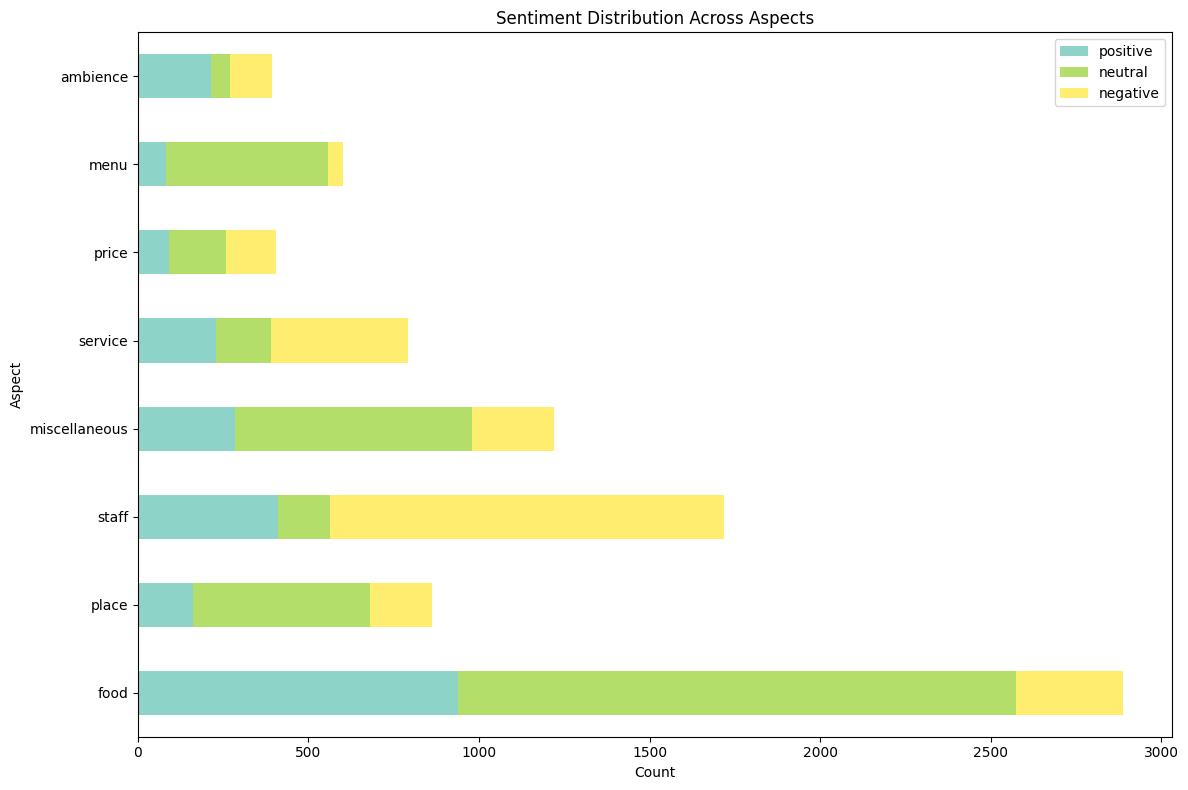

In [ ]:
# Business Insight: Sentiment Distribution Across Aspects with Percentages
def sentiment_distribution_across_aspects(data):
    sentiment_distribution = {}
    for review in data:
        aspect = str(review[1])
        sentiment = str(review[2])

        if aspect not in sentiment_distribution:
            sentiment_distribution[aspect] = {'positive': 0, 'neutral': 0, 'negative': 0}

        if sentiment == 'positive':
            sentiment_distribution[aspect]['positive'] += 1
        elif sentiment == 'neutral':
            sentiment_distribution[aspect]['neutral'] += 1
        elif sentiment == 'negative':
            sentiment_distribution[aspect]['negative'] += 1

    # Convert to DataFrame
    sentiment_df = pd.DataFrame.from_dict(sentiment_distribution, orient='index')

    # Calculate total counts and percentages
    sentiment_df['total'] = sentiment_df.sum(axis=1)
    sentiment_df['positive_percentage'] = (sentiment_df['positive'] / sentiment_df['total']) * 100
    sentiment_df['neutral_percentage'] = (sentiment_df['neutral'] / sentiment_df['total']) * 100
    sentiment_df['negative_percentage'] = (sentiment_df['negative'] / sentiment_df['total']) * 100

    sentiment_df = sentiment_df.fillna(0)
    return sentiment_df

# Apply to combined data
aspect_sentiment_df = sentiment_distribution_across_aspects(combine_original)

# Print sentiment distribution with percentages
print(aspect_sentiment_df[['positive_percentage', 'neutral_percentage', 'negative_percentage']])

# Plotting the sentiment distribution across aspects
def plot_sentiment_distribution(df):
    df[['positive', 'neutral', 'negative']].plot(kind='barh', stacked=True, figsize=(12, 8), colormap='Set3')
    plt.title("Sentiment Distribution Across Aspects")
    plt.xlabel('Count')
    plt.ylabel('Aspect')
    plt.tight_layout()
    plt.show()

plot_sentiment_distribution(aspect_sentiment_df)


Seeing that food got pretty good review, since there are only around 11% for negative reviews, the rest are neutral and positive.
However, the most noticable aspects are staff and service aspects since these two have high negative reviews (67% and 51% respectively)

To dive deeper and got more meaningful insights, using NLP model to help track down the sentences, words sentiment will help business pinpoint exact area for improvement.

Below are the process of cleaning and prepare data for LSTM with attention model. We will train the model to see how accurate it is and then will apply to the dataset.

NOW, LET'S START:

The cleaning process for each dataset will be done in the following chunk of codes. At first, all contradiction words will be replaced and followed by puctuation and digits removal. After that, each sentence input will be tokenized.


There are many embedding methods but according to one of my recent research, word2vec with skip gram has highest accuracy.

In [ ]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have",
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did",
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have",
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have",
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us",
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have",
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not",
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have",
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will",
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have",
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def cleaning_process(data):
  stop_words = set(stopwords.words('english'))
  output = []
  for sent in data:
      token_sent = []
      sent = sent.lower() #case-folding
      for word, new_word in contraction_dict.items():
          sent = sent.replace(word, new_word) #dealing with contractions
      sent = re.sub(r'[^\w\s]','',sent) #removing punctuation
      sent = re.sub(r"\d", '', sent) ##removing digit
      for word in sent.split():
          if word not in stop_words and word != '':
            token_sent.append(word)
      output.append(token_sent)

  return output


all_reviews = cleaning_process(all_reviews)
## no need to clean for aspect as its already in lower case


## create list of words
words = set([])
for s in all_reviews:
    for w in s:
        words.add(w.lower())

for w in all_aspects:
    words.add(w.lower())


As all the input sentences need to have the same length, maximum padding need to be find out first.

In [ ]:
## Find out the max embedding

def word_counter(sentences):
  max_words = 0
  for sentence in sentences:
      max_words = max(max_words, len(sentence))
  return max_words

print("Maximum number of words in all data:", word_counter(all_reviews))
### 67 embedding is the result

Maximum number of words in all data: 40


In [ ]:
## Find out the min embedding

def word_counter(sentences):
    min_words = float('inf')  # Set to infinity initially
    for sentence in sentences:
        min_words = min(min_words, len(sentence))  # Split into words
    return min_words

print("Minimum number of words in all data:", word_counter(all_reviews))


Minimum number of words in all data: 3


In [ ]:
max_length = 40 #40

Now, We also need to encode the label to be one hot.

In [ ]:
## Label output
sentiment_mapping = {'positive': [1, 0, 0],
                     'neutral': [0, 1, 0],
                     'negative': [0, 0, 1]}

label_torch = torch.tensor( [sentiment_mapping[sentiment] for sentiment in all_labels], dtype=torch.float32)

## Word2Vec SkipGram

Firstly, we will need to combine all words in both train and test dataset. Note that we concat reviews and aspect together as there is no "miscellaneous" word presents in the reviews.

In [ ]:
all_rev_asp = [sublist + [all_aspects[i]] for i, sublist in enumerate(all_reviews)]
len(all_rev_asp)

8879

In [ ]:
def text_embed_w2v(words, w2v, max_length):
    unknown_indices = []
    result = np.zeros(50*max_length).reshape((max_length,50))
    mean = np.zeros(50)

    for i in range(len(words)):
      if words[i] in w2v.wv:
          result[i] = w2v.wv[words[i]]
          mean += result[i]
      else:
          unknown_indices.append(i)

    mean /= len(words)-len(unknown_indices)

    # unknown words in the text are represented using the mean of the known words
    for i in unknown_indices:
        result[i] = mean

    return np.array(result)

In [ ]:
wv_skipgram_model = Word2Vec(all_rev_asp, vector_size=50, window=1, min_count=1, workers=1, sg=1)

In [ ]:
vocab = {index: word for word, index in wv_skipgram_model.wv.key_to_index.items()}

In [ ]:
# Combined dataset embedding
review_embed = []
aspect_embed = []

# Embedding for combined reviews
for i in all_reviews:
    sentence_embed = text_embed_w2v(i, wv_skipgram_model, max_length)
    review_embed.append(sentence_embed)

# Embedding for combined aspects
for i in all_aspects:
    aspect_embed.append([wv_skipgram_model.wv[i]])

# Now, review_embed and aspect_embed contain embeddings for all data

import torch
import numpy as np

# Convert combined embeddings to tensors
review_torch = torch.tensor(np.array(review_embed), dtype=torch.float32)
aspect_torch = torch.tensor(np.array(aspect_embed), dtype=torch.float32)

# Concatenate review and aspect tensors
final_w2v_skipgram = torch.cat((review_torch, aspect_torch), dim=1)

# Check the shape of the final tensor
final_w2v_skipgram.shape

torch.Size([8879, 41, 50])

# Model - LSTM with attention

In this model, the main goal is to use the aspect information effectively in conjunction with the review information in the LSTM-based model with attention.

Note that our input is the concatenation between reviews and aspects. As the reviews has maximum length of 40 and aspect only has one length, the concatenation between the two of them will be 41. The Steps are:

1. Use the entire review and aspect information as input to the LSTM.
2. Apply the attention mechanism to compute the attention weights and context vector.
3. Combine the context vector with the aspect information before passing it through the fully connected layer.
4. Apply softmax layer to convert the result into categorization vectors.

AT-LSTM model with Word2Vec Skipgram-input is the best model

In [ ]:
class LSTMWithAttention(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        ## input_size : ([8879, 41, 50])
        ## hidden_size : 50
        ## output_size : 3

        super(LSTMWithAttention, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc1 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_seq):
        ## use all inputs information (both reviews + aspects)
        ## input_seq = ([8879, 41, 50])
        input_seq = input_seq.permute(1, 0, 2)  ## permute it first to ([41, 8879, 50]) since we want to take all 8879 hidden layers
        lstm_out,(hidden, cell) = self.lstm(input_seq)  # lstm_out shape: [batch_size, seq_length, hidden_size]
        ## now the hidden will have Size([1, 8879, 50])
        lstm_out = lstm_out.permute(1, 0, 2) ## change it back to how it supposed to be ([8879, 41, 50])

        hidden = hidden.squeeze(0) ## now the size is ([8879, 50])

        ## do weighted sum lsmt_out([8879, 41, 50]) * hidden ([8879, 50, 1])
        ## the result will be ([8879, 41]) >> 8879 inputs where each input has 41 words
        attention_weights = torch.bmm(lstm_out, hidden.unsqueeze(2)).squeeze(2) ## calculate the attention of for all inputs

        ## use softmax to make all the 41 words weight bcm probability
        attention_weights = F.softmax(attention_weights, dim=1)

        ## calculate the lstm_output itself with the attention probability
        result_self_attention = torch.bmm(lstm_out.transpose(1, 2),
                                     attention_weights.unsqueeze(2)).squeeze(2)

        ## add another layer of neural network
        fc1_out = self.fc1(result_self_attention.squeeze(0))

        # Apply softmax for class probability
        output = self.softmax(fc1_out)

        return output, attention_weights


### Word2Vec Skipgram-Input (best)


In [ ]:
# Get the embedding size from the Word2Vec model
embedding_size = wv_skipgram_model.vector_size
hidden_size = 50
output_size = label_torch.size(-1)

# Initialize the model
model = LSTMWithAttention(embedding_size, hidden_size, output_size)


# Define loss function and optimizer - adam
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Lists to store loss and accuracy values
losses = []
accuracies = []

# Training loop for the combined dataset
for epoch in range(1000):  # Training for 100 epochs
    model.train()  # Set the model to training mode

    optimizer.zero_grad()
    output, weight = model(final_w2v_skipgram)  # Forward pass with combined data

    # Calculate loss
    loss = criterion(output, label_torch)  # Assuming label_torch is the combined label tensor

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    with torch.no_grad():
        output, _ = model(final_w2v_skipgram)

        # Assuming output is logits, get predictions
        predictions = torch.argmax(output, dim=1)

        # Convert one-hot encoded labels to class indices
        label_indices = torch.argmax(label_torch, dim=1)
        accuracy = (predictions == label_indices).float().mean().item()
        accuracies.append(accuracy)

    # Store loss
    losses.append(loss.item())

    # Print loss and accuracy every 10 epochs
    if epoch % 50 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, 50, loss.item(), accuracy))


Epoch [1/50], Loss: 0.9532, Accuracy: 0.5913
Epoch [51/50], Loss: 0.9466, Accuracy: 0.5947
Epoch [101/50], Loss: 0.9290, Accuracy: 0.6064
Epoch [151/50], Loss: 0.9204, Accuracy: 0.6153
Epoch [201/50], Loss: 0.9146, Accuracy: 0.6242
Epoch [251/50], Loss: 0.9071, Accuracy: 0.6299
Epoch [301/50], Loss: 0.9027, Accuracy: 0.6373
Epoch [351/50], Loss: 0.8993, Accuracy: 0.6403
Epoch [401/50], Loss: 0.8948, Accuracy: 0.6423
Epoch [451/50], Loss: 0.8923, Accuracy: 0.6518
Epoch [501/50], Loss: 0.8930, Accuracy: 0.6451
Epoch [551/50], Loss: 0.8871, Accuracy: 0.6527
Epoch [601/50], Loss: 0.8844, Accuracy: 0.6584
Epoch [651/50], Loss: 0.8826, Accuracy: 0.6662
Epoch [701/50], Loss: 0.8778, Accuracy: 0.6707
Epoch [751/50], Loss: 0.8770, Accuracy: 0.6684
Epoch [801/50], Loss: 0.8715, Accuracy: 0.6728
Epoch [851/50], Loss: 0.8730, Accuracy: 0.6696
Epoch [901/50], Loss: 0.8691, Accuracy: 0.6744
Epoch [951/50], Loss: 0.8720, Accuracy: 0.6700


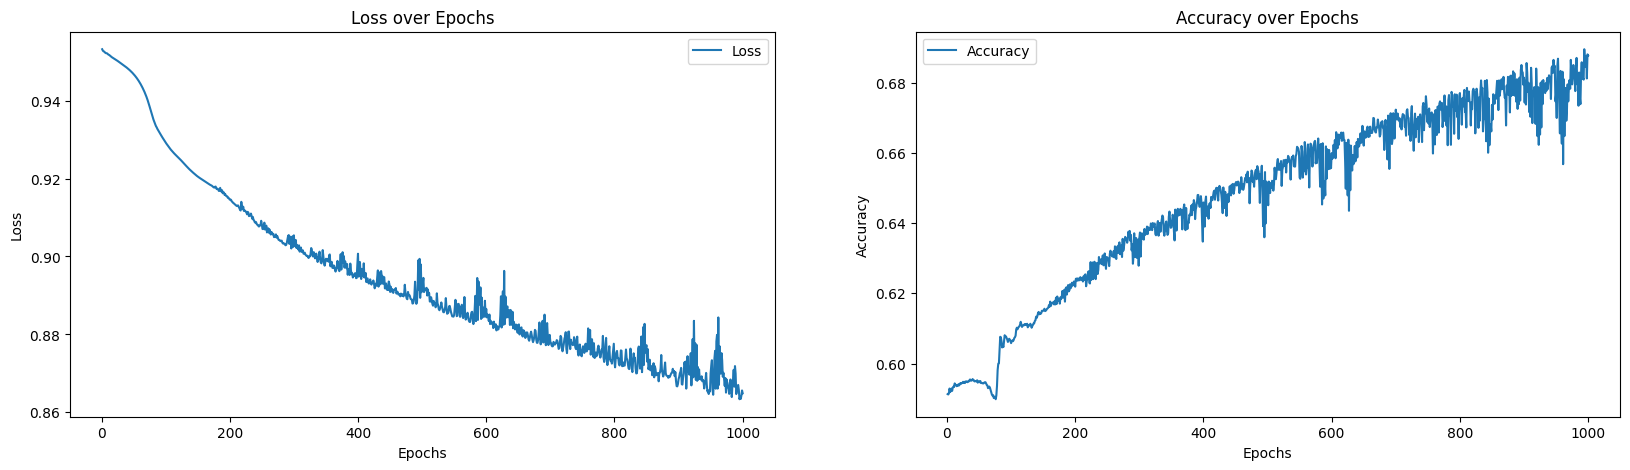

In [ ]:
import matplotlib.pyplot as plt

# Plot loss and accuracy against epoch side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Plot loss
axs[0].plot(range(1, len(losses) + 1), losses, label='Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss over Epochs')
axs[0].legend()

# Plot accuracy
axs[1].plot(range(1, len(accuracies) + 1), accuracies, label='Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy over Epochs')
axs[1].legend()

plt.show()


Ideal Epochs for Training (use 1000)

Early Epochs: In these epochs, the model is typically learning the basic structure of the data. You might see a steep drop in loss and improvement in accuracy.

Later Epochs: The learning curve often slows down. While the model's performance may still improve, the gains diminish after a certain point.



In [ ]:
# Testing loop
output_test,weight_test = model(final_w2v_skipgram)
output_test = output_test.detach().numpy()

max_indices = np.argmax(output_test, axis=1)
predicted_w2v_skipgram = np.zeros_like(output_test)
predicted_w2v_skipgram[np.arange(len(output_test)), max_indices] = 1

num_correct = np.sum(np.all(predicted_w2v_skipgram == label_torch.numpy(), axis=1))

print("Number of correct answers:", num_correct)

# Compute confusion matrix
conf_matrix = np.zeros((predicted_w2v_skipgram.shape[1], label_torch.numpy().shape[1]), dtype=int)
for pred, true in zip(predicted_w2v_skipgram, label_torch.numpy()):
    pred_idx = np.where(pred == 1)[0]
    true_idx = np.where(true == 1)[0]
    conf_matrix[true_idx[:, None], pred_idx] += 1

# Convert confusion matrix to DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True Positive', 'True Neutral', 'True Negative'],
                              columns=['Predicted Positive', 'Predicted Neutral', 'Predicted Negative'])

print("Confusion matrix:")
print(conf_matrix_df)

accuracy_w2v_skipgram = num_correct / label_torch.numpy().shape[0]
accuracy_w2v_skipgram_percentage = accuracy_w2v_skipgram * 100

print(f"Accuracy: {accuracy_w2v_skipgram_percentage:.2f}%")

# Classification report
class_names = ["positive", "neutral", "negative"]
cr = classification_report(label_torch.numpy(), predicted_w2v_skipgram, target_names=class_names)
print("Classification Report:")
print(cr)


Number of correct answers: 6107
Confusion matrix:
               Predicted Positive  Predicted Neutral  Predicted Negative
True Positive                1192                735                 488
True Neutral                  411               3226                 221
True Negative                 372                545                1689
Accuracy: 68.78%
Classification Report:
              precision    recall  f1-score   support

    positive       0.60      0.49      0.54      2415
     neutral       0.72      0.84      0.77      3858
    negative       0.70      0.65      0.68      2606

   micro avg       0.69      0.69      0.69      8879
   macro avg       0.67      0.66      0.66      8879
weighted avg       0.68      0.69      0.68      8879
 samples avg       0.69      0.69      0.69      8879



After testing the model and we have arpund 65% accuracy, not really good but not bad as well.

To enables deeper insights into customer feedback by understanding not just the sentiment but also the specific reasons behind it.

We need to extract the top weighted words from each review using the model above.

## Using best model for dataset

In [ ]:
output_test, weight_test = model(final_w2v_skipgram)  # Get predictions and attention weights

# Convert attention weights to numpy for easier manipulation
weight_test = weight_test.detach().numpy()

# Function to print the top weighted words dynamically for all reviews
def print_top_weighted_words_for_all_reviews():
    for review_idx in range(len(all_reviews)):
        attention_weights = weight_test[review_idx]  # Attention weights for this review
        words_in_review = all_reviews[review_idx]  # Words in this review

        # Create a list of tuples (word, attention_weight)
        word_attention_pairs = list(zip(words_in_review, attention_weights))

        # Sort words based on attention weights in descending order
        sorted_word_attention_pairs = sorted(word_attention_pairs, key=lambda x: x[1], reverse=True)

        # Determine the top N words based on the number of words in the review
        top_n = min(10, len(sorted_word_attention_pairs))

        print(f"\nTop {top_n} weighted words for Review {review_idx + 1}:")
        for i in range(top_n):
            word, weight = sorted_word_attention_pairs[i]
            print(f"{i+1}. Word: '{word}', Attention Weight: {weight.item()}")

# Call the function
print_top_weighted_words_for_all_reviews()


Streaming output truncated to the last 5000 lines.
8. Word: 'recommendations', Attention Weight: 6.962619227124378e-05
9. Word: 'make', Attention Weight: 1.9112558220513165e-05
10. Word: 'unable', Attention Weight: 2.5617571282054996e-06

Top 10 weighted words for Review 8425:
1. Word: 'meal', Attention Weight: 0.0003275021445006132
2. Word: 'back', Attention Weight: 0.00031615738407708704
3. Word: 'course', Attention Weight: 0.00025851771351881325
4. Word: 'check', Attention Weight: 0.0002138705604011193
5. Word: 'failed', Attention Weight: 7.726356852799654e-05
6. Word: 'special', Attention Weight: 4.378045196062885e-05
7. Word: 'mumbled', Attention Weight: 1.437824630556861e-05
8. Word: 'recommendations', Attention Weight: 5.385367330745794e-06
9. Word: 'make', Attention Weight: 9.009744417198817e-07
10. Word: 'unable', Attention Weight: 8.866149414643587e-08

Top 10 weighted words for Review 8426:
1. Word: 'meal', Attention Weight: 0.04683590680360794
2. Word: 'back', Attention Wei

Extracting top 10 weighed words and combine with the aspects as well as the polarity of that review.

In [ ]:
# List to hold the processed data
processed_data = []

# Iterate over all reviews
for review_idx in range(len(all_reviews)):
    # Get the attention weights and words for the current review
    attention_weights = weight_test[review_idx]
    words_in_review = all_reviews[review_idx]
    aspect = all_aspects[review_idx]
    polarity = all_labels[review_idx]  # Assuming you have a polarity list

    # Create a list of tuples (word, attention_weight)
    word_attention_pairs = list(zip(words_in_review, attention_weights))

    # Sort words based on attention weights in descending order
    sorted_word_attention_pairs = sorted(word_attention_pairs, key=lambda x: x[1], reverse=True)

    # Determine the top N words based on the number of words in the review
    top_n = min(10, len(sorted_word_attention_pairs))
    top_words = [sorted_word_attention_pairs[i][0] for i in range(top_n)]

    # Create a dictionary for the current review
    review_data = {
        "review_index": review_idx + 1,
        "top_words": top_words,
        "aspect": aspect,
        "polarity": polarity
    }

    # Append the dictionary to the processed_data list
    processed_data.append(review_data)

# Convert the list of dictionaries to a DataFrame
review_processed = pd.DataFrame(processed_data)

# Save the DataFrame to a CSV file
# review_processed.to_csv("review_analysis.csv", index=False)

review_processed


review_index                                          top_words  \
0                1  [place, could, garden, brigade, citizen, uprig...   
1                2  [place, could, garden, brigade, citizen, uprig...   
2                3  [reservation, hour, early, arrived, accommodat...   
3                4  [reservation, early, hour, arrived, accommodat...   
4                5  [hostess, got, attitude, deserved, think, gues...   
...            ...                                                ...   
8874          8875   [good, waiters, attention, lot, receive, tables]   
8875          8876   [good, waiters, attention, lot, receive, tables]   
8876          8877  [staff, attention, greetings, level, needed, c...   
8877          8878  [staff, attention, level, greetings, needed, c...   
8878          8879  [staff, greetings, attention, level, needed, c...   

             aspect  polarity  
0              food  positive  
1             place   neutral  
2             staff  positive  
3     miscellaneous   neutral  
4     miscellaneous   neutral  
...             ...       ...  
8874          place   neutral  
8875          staff  positive  
8876  miscellaneous   neutral  
8877           food   neutral  
8878          staff  positive  

[8879 rows x 4 columns]

## Visualizing

Now that we have the dataset from the model, let's analyze the food reviews to understand why people like it. This will help us identify key points for marketing or other strategies.

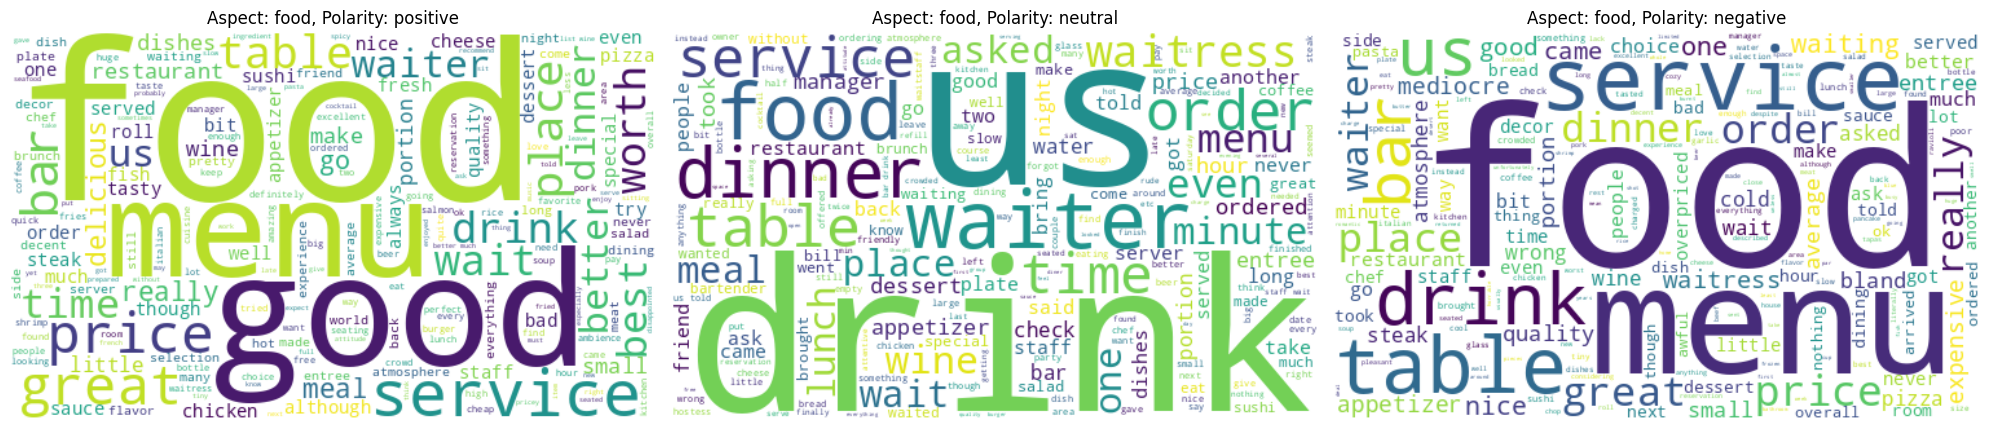

In [ ]:
# Specify the aspect you want to visualize
specific_aspect = 'food'

# Filter the DataFrame for the specific aspect
filtered_reviews = review_processed[review_processed['aspect'] == specific_aspect]

# Determine unique polarities for this specific aspect
unique_polarities = filtered_reviews['polarity'].unique()

# Set up the plot dimensions (one row per polarity)
fig, axes = plt.subplots(nrows=1, ncols=len(unique_polarities), figsize=(20, 20))

# Ensure axes is a list for consistent indexing
if len(unique_polarities) == 1:
    axes = [axes]

# Generate a word cloud for each polarity of the specific aspect
for idx, polarity in enumerate(unique_polarities):
    # Get the subset of reviews for this polarity
    group = filtered_reviews[filtered_reviews['polarity'] == polarity]

    # Concatenate all words for this group
    all_words = ' '.join([' '.join(words if isinstance(words, list) else eval(words)) for words in group['top_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=500, height=300, background_color='white').generate(all_words)

    # Display the word cloud in the corresponding subplot
    ax = axes[idx]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Aspect: {specific_aspect}, Polarity: {polarity}')
    ax.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Comment on Food Aspect:
- Positive Sentiment: Words like "good", "great", "menu", "price", "service", "waiter", "worth", "best", "better", and "delicious" dominate.
- Neutral Sentiment: Common words include "service", "food", "table", "drink", "waiter", "order", "waitress", "time", "place", and "dinner"
- Negative Sentiment: The word "food", "service", "menu", "bland", "price", "expensive", "cold", "waiting", "overprice", and "average"

Now, let's have a look at our top 3 aspect got most reviews "miscellaneous"

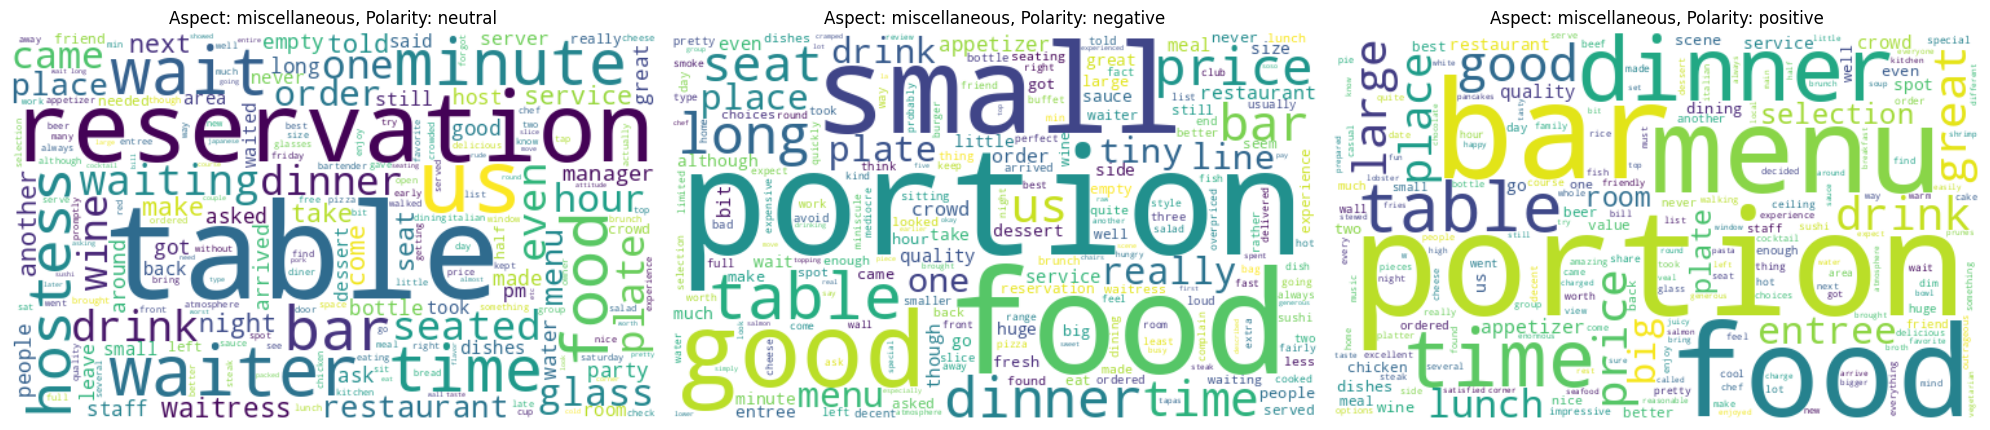

In [ ]:
# Specify the aspect you want to visualize
specific_aspect = 'miscellaneous'

# Filter the DataFrame for the specific aspect
filtered_reviews = review_processed[review_processed['aspect'] == specific_aspect]

# Determine unique polarities for this specific aspect
unique_polarities = filtered_reviews['polarity'].unique()

# Set up the plot dimensions (one row per polarity)
fig, axes = plt.subplots(nrows=1, ncols=len(unique_polarities), figsize=(20, 20))

# Ensure axes is a list for consistent indexing
if len(unique_polarities) == 1:
    axes = [axes]

# Generate a word cloud for each polarity of the specific aspect
for idx, polarity in enumerate(unique_polarities):
    # Get the subset of reviews for this polarity
    group = filtered_reviews[filtered_reviews['polarity'] == polarity]

    # Concatenate all words for this group
    all_words = ' '.join([' '.join(words if isinstance(words, list) else eval(words)) for words in group['top_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=500, height=300, background_color='white').generate(all_words)

    # Display the word cloud in the corresponding subplot
    ax = axes[idx]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Aspect: {specific_aspect}, Polarity: {polarity}')
    ax.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Comment on Miscellaneous Aspect:
- Positive Sentiment: Words like "portion", "entree", "menu", "place", "great", "price", "big", "time", "good", and "quality" dominate.
- Neutral Sentiment: Common words include "reservation", "table", "wait", "waiter", "hostess", "seated", "drink", "dessert", "waiting", and "time"
- Negative Sentiment: The word "small", "portion", "table", "food", "price", "seat", "long", "line", "tiny", and "crowd"

Now, let's have a look at staff aspect

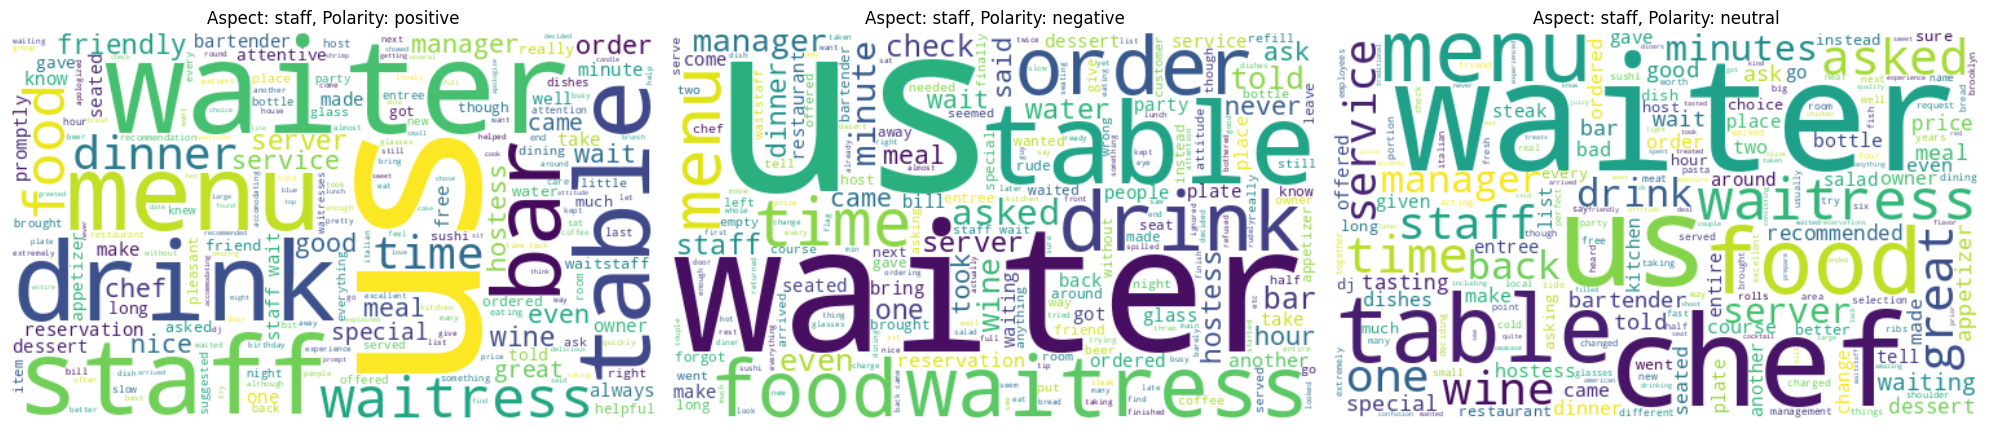

In [ ]:
# Specify the aspect you want to visualize
specific_aspect = 'staff'

# Filter the DataFrame for the specific aspect
filtered_reviews = review_processed[review_processed['aspect'] == specific_aspect]

# Determine unique polarities for this specific aspect
unique_polarities = filtered_reviews['polarity'].unique()

# Set up the plot dimensions (one row per polarity)
fig, axes = plt.subplots(nrows=1, ncols=len(unique_polarities), figsize=(20, 20))

# Ensure axes is a list for consistent indexing
if len(unique_polarities) == 1:
    axes = [axes]

# Generate a word cloud for each polarity of the specific aspect
for idx, polarity in enumerate(unique_polarities):
    # Get the subset of reviews for this polarity
    group = filtered_reviews[filtered_reviews['polarity'] == polarity]

    # Concatenate all words for this group
    all_words = ' '.join([' '.join(words if isinstance(words, list) else eval(words)) for words in group['top_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=500, height=300, background_color='white').generate(all_words)

    # Display the word cloud in the corresponding subplot
    ax = axes[idx]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Aspect: {specific_aspect}, Polarity: {polarity}')
    ax.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Comment on Staff Aspect:
- Positive Sentiment: Words like "table", "staff", "waiter", "friendly", "nice", "attentive", "helpful", "promtly", "server", and "appetizer" dominate.
- Neutral Sentiment: Common words include "waiter", "food", "chef", "table", "menu", "time", "staff", "manager", "waitress", and "service"
- Negative Sentiment: The word "order", "table", "time", "waiter", "rude", "attitude", "manager", "waiting", "seated", and "minute"

Next, let's look into service aspect

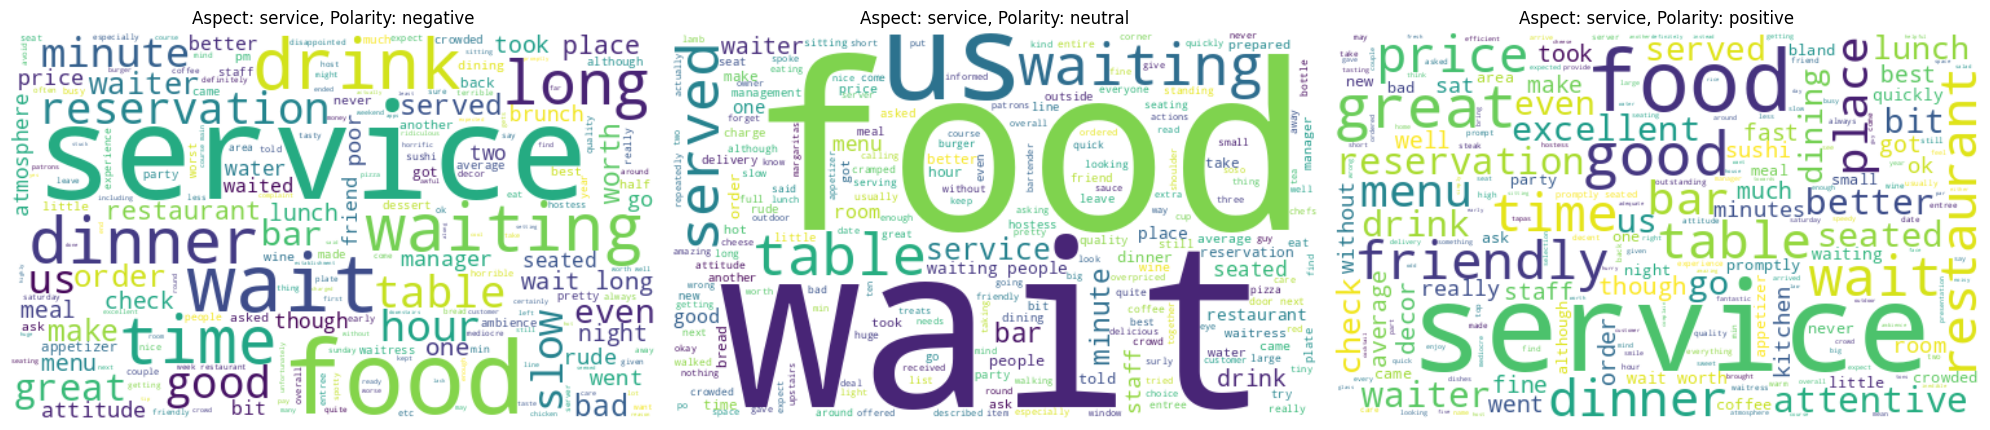

In [ ]:
# Specify the aspect you want to visualize
specific_aspect = 'service'

# Filter the DataFrame for the specific aspect
filtered_reviews = review_processed[review_processed['aspect'] == specific_aspect]

# Determine unique polarities for this specific aspect
unique_polarities = filtered_reviews['polarity'].unique()

# Set up the plot dimensions (one row per polarity)
fig, axes = plt.subplots(nrows=1, ncols=len(unique_polarities), figsize=(20, 20))

# Ensure axes is a list for consistent indexing
if len(unique_polarities) == 1:
    axes = [axes]

# Generate a word cloud for each polarity of the specific aspect
for idx, polarity in enumerate(unique_polarities):
    # Get the subset of reviews for this polarity
    group = filtered_reviews[filtered_reviews['polarity'] == polarity]

    # Concatenate all words for this group
    all_words = ' '.join([' '.join(words if isinstance(words, list) else eval(words)) for words in group['top_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=500, height=300, background_color='white').generate(all_words)

    # Display the word cloud in the corresponding subplot
    ax = axes[idx]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Aspect: {specific_aspect}, Polarity: {polarity}')
    ax.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Comment on Service Aspect:
- Positive Sentiment: Words like "good", "friendly", "great", "attentive", "service", "attentive", "excellent", "best", "quickly", and "better" dominate.
- Neutral Sentiment: Common words include "food", "waiting", "service", "table", "average", "drink", "seated", "reservation", "good", and "quick"
- Negative Sentiment: The word "service", "wait long", "crowded", "hour", "slow", "rude", "bad", "poor", "price", and "reservation"

## RECOMMENDATIONS:

Based on the information of Sentiment Distribution Across Aspects plot, Top Aspects in Term of Frequency, and wordclouds of some aspects, we have some observe and recommendations:

1. Food - most discussed aspect

Finding:
- Food is the most frequently mentioned aspect
- Positive Sentiments: Words like "delicious," "best," "worth," "great," "good" indicate satisfaction.
- Neutral Words: "service," "waiter," "menu," "table," "order" suggest that food discussions often involve service experiences.
- Negative Words: "bland," "cold," "overpriced," "waiting," "average" highlight concerns about food quality, temperature, and price.

Recommendations:
- Improve Consistency: Ensure food temperature and taste remain consistent across different visits.
- Menu Adjustments: Address concerns about food blandness—consider introducing bolder flavors or customizable spice levels.
- Value Perception: Offer combo deals or portion size options to balance pricing concerns.
- Speed Up Food Preparation: Since "waiting" appears frequently, reducing food preparation time is essential.

2. Staff - second most discussed, and most negative aspect

Finding:
- Staff is the second most frequently mentioned topic.
- Positive Sentiments: Words like "friendly," "attentive," "helpful," "promptly" indicate some customers appreciate good service.
- Negative Words: "rude," "attitude," "waiting," "seated," "order," "manager" show dissatisfaction with staff behavior and long wait times.

Recommendations: Since this aspect has most negative review, consider:
- Customer Service Training: Reinforce polite and professional communication to reduce complaints about rudeness.
- Handling Peak Hours: Implement better queue management and proactive updates to customers about wait times.
- Improve Staff Motivation: Employee incentives for good service could improve engagement and attitude.
- Clearer Seating Process: Address complaints about "seated" and "waiting" by streamlining table assignments.

3. Miscellaneous - third most concerned, and high neutral review

Finding:
- Miscellaneous aspects often involve elements like portion size, seating, reservations, and general dining experience.
- Neutral Words: "reservation," "table," "wait," "hostess," "dessert," "drink"
Negative Words: "small," "portion," "long," "line," "tiny," "crowd"
- The majority of these reviews are neutral, which means they are not particularly satisfied or dissatisfied—an opportunity for improvement.

Recommendations:
- Enhance Reservation & Seating Experience: Digital waitlist systems or pre-booking options can reduce complaints about "table," "long," and "line."
- Portion Size Adjustments: If "small" portions are a common complaint, either adjust portion sizes or clearly communicate portion expectations in the menu.
- Improve Waiting Area Comfort: Since "crowd" and "tiny" appear in complaints, consider expanding seating space or managing reservations better.

4. Service - highly negative review aspect

Finding:
- Service has a high proportion of negative sentiment, which affects overall customer satisfaction.
- Positive Sentiments: "attentive," "excellent," "quickly"
- Negative Words: "wait long," "slow," "rude," "bad," "poor," "hour"

Recommendations:

- Reduce Waiting Times: Optimize kitchen workflow and improve order management to address complaints about slow service.
- Empower Staff to Handle Issues Proactively: Provide training on diffusing customer frustration and resolving complaints efficiently.
- Monitor Peak Hour Performance: Use customer feedback to determine when service issues arise most and allocate resources accordingly.

Below code is for checking and reading some negative reviews in staff aspects

In [ ]:
# Assuming df is your DataFrame with columns 'review', 'aspect', 'label'
# Filter out negative reviews
negative_reviews = df[df['label'] == 'negative']

# Group by aspect (e.g., 'staff' and 'service')
staff_negative_reviews = negative_reviews[negative_reviews['aspect'] == 'staff']
service_negative_reviews = negative_reviews[negative_reviews['aspect'] == 'service']

# For each aspect, get the most repeated review (if review appears multiple times, we keep only one)
# This can be done by dropping duplicates (if the same review is repeated across aspects)
staff_negative_reviews_unique = staff_negative_reviews.drop_duplicates(subset=['review'])
service_negative_reviews_unique = service_negative_reviews.drop_duplicates(subset=['review'])

# Combine the two aspect-based reviews if needed
combined_negative_reviews = pd.concat([staff_negative_reviews_unique, service_negative_reviews_unique])


In [ ]:
combined_negative_reviews[combined_negative_reviews['aspect'] == 'staff']


review aspect     label
5     We were a couple of minutes late for our reser...  staff  negative
8     Although we arrived at the restaurant 10 min l...  staff  negative
18    It was very loud, I felt too crowded, the man ...  staff  negative
30    I was told by the hostess that a specific tabl...  staff  negative
33    Towards the end of our meal, a server came out...  staff  negative
...                                                 ...    ...       ...
8822  In the 20 minutes we spent waiting just for a ...  staff  negative
8849  The wait staff rushed us through our meal, too...  staff  negative
8853  i went there for dinner on friday night, the w...  staff  negative
8868  The waitresses and the diners have to scream a...  staff  negative
8873  We had a reservation and 2 of us showed up on ...  staff  negative

[1154 rows x 3 columns]